In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
# show top and bottom

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [6]:
# status summary

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
# distribution plot

C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_2416\2882309141.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


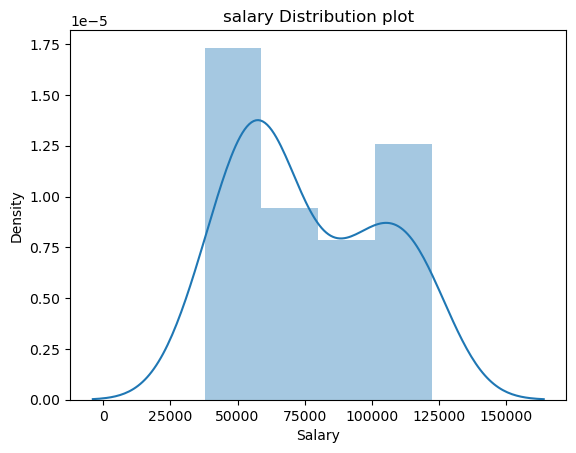

In [9]:
plt.title('salary Distribution plot')
sns.distplot(df['Salary'])
plt.show()

In [10]:
# scatter plot

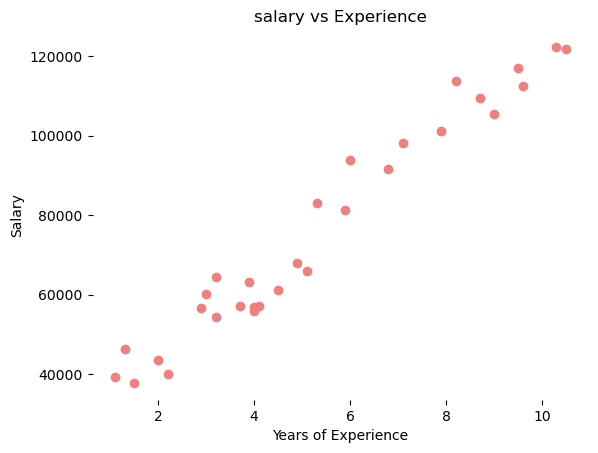

In [11]:
plt.scatter(df['YearsExperience'],df['Salary'],color = 'lightcoral')
plt.title('salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [12]:
# find out dependent and independent variable

In [13]:
x = df.loc[:,['YearsExperience']]
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [14]:
y = df.loc[:,['Salary']]
y.head()

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891


In [15]:
# split

In [16]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
x_train.shape

(21, 1)

In [18]:
x_test.shape

(9, 1)

In [19]:
# train

In [20]:
reg=LinearRegression()

In [21]:
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
# predict

In [23]:
y_pred_test = reg.predict(x_test)

In [24]:
y_pred_train = reg.predict(x_train)

In [25]:
y_pred_test

array([[115573.62288352],
       [ 71679.93878159],
       [102498.90847018],
       [ 75415.57147111],
       [ 55803.4998511 ],
       [ 60473.04071301],
       [122110.98009019],
       [107168.44933209],
       [ 63274.76523015]])

In [26]:
y_pred_train

array([[ 36191.42823109],
       [ 46464.41812729],
       [ 73547.75512635],
       [ 53001.77533396],
       [ 64208.67340254],
       [ 63274.76523015],
       [ 99697.18395303],
       [ 38059.24457585],
       [ 39927.06092062],
       [109970.17384923],
       [ 44596.60178252],
       [ 92225.91857398],
       [114639.71471114],
       [ 81019.0205054 ],
       [123978.79643495],
       [ 89424.19405684],
       [ 55803.4998511 ],
       [ 62340.85705777],
       [ 67944.30609206],
       [ 81952.92867778],
       [ 53935.68350634]])

In [27]:
# Predict

In [28]:
reg.predict([[1.2]])

C:\Users\Aditya Singh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37125.33640347]])

In [29]:
# accuracy

In [30]:
reg.score(x_test,y_test)

0.9414466227178214

In [31]:
reg.score(x_train,y_train)

0.9574526669392872

In [32]:
# validation(check by formula)

In [33]:
intercept=reg.intercept_

In [34]:
coefficient=reg.coef_

In [35]:
#  y= mx+c

In [36]:
def formula(x):
    salary= coefficient*x+intercept
    print (salary)
    
formula(1.2)

[[37125.33640347]]


In [37]:
# visualization(Best fit line)

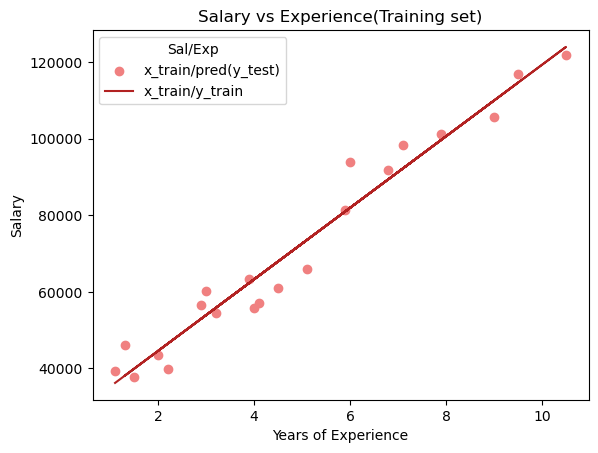

In [38]:
plt.scatter(x_train,y_train,color='lightcoral')
plt.plot(x_train,y_pred_train,color='firebrick')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['x_train/pred(y_test)','x_train/y_train'],title= 'Sal/Exp',loc='best')


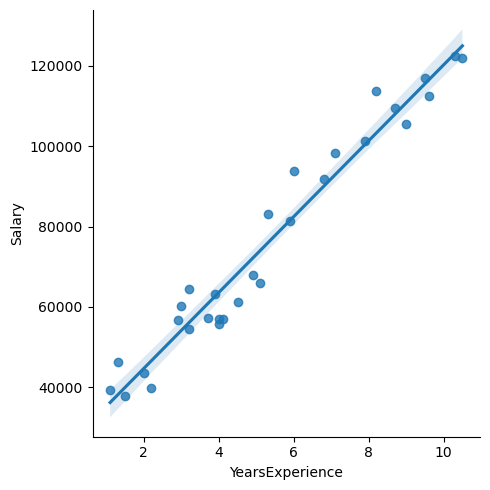

In [39]:
sns.lmplot(x='YearsExperience',y='Salary',data=df)